<a href="https://colab.research.google.com/github/rnmarin/portfolio/blob/main/L'analysedesdonn%C3%A9esAirbnbParisfr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


###<center>**Renan Marin: Accountant, but not a common accountant**<center>

---




#L'analyse des données Airbnb:

** Airbnb ** est l'une des plus grandes sociétés hôtelières au monde et la chose plus intéressante qu'il n'a pas d'hôtels.

Mettre en relation les personnes qui voyagent avec des hôtes qui souhaitent louer leur propriété de manière agile, simple et sécurisée. À la fin de 2018, l'entreprise avait déjà aidé plus de **300 millions de clients** à la recherche d'une bonne expérience.

L'une de ses vertus est de rendre disponibles ses données sur les principales villes et villages du monde via le portail [Inside Airbnb](http://insideairbnb.com/get-the-data.html), ce qui nous permet d'en déduire utilisation des données et de la puissance des techniques de * Data Science *.


<center><img alt="Analisando Airbnb" width="30%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

<center>

La ville choisie pour cette étude exploratoire était:

<br>

<center>

###**PARIS**

<center><img alt="Analisando Airbnb" width="30%" src="https://upload.wikimedia.org/wikipedia/en/thumb/c/c3/Flag_of_France.svg/375px-Flag_of_France.svg.png"></center>


**Dans ce *notebook*, j'analyserai les données de la ville de Paris et vérifierai quelles *insights* peuvent être tirés des données brutes fournies par Airbnb.**





<br>

Paris aussi connu sous le nom de *La ville lumière*, pour ceux qui la connaissent déjà, de nombreuses explications sur sa beauté et son romantisme ne sont pas nécessaires. Une ville riche en détails et avec un air historique fascinant. Sixième capitale la plus visitée au monde, selon une enquête menée par *Euromonitor International* en 2019.

<br>

Le surnom de ville lumière désigne des événements historiques importants. En 1665, e premier système d'éclairage public été créé à Paris et en 1881 la ville a accueilli la première exposition internationale d'électricité. En outre, la ville était un bastion important de penseurs, philosophes et artistes du mouvement des Lumières.

<br>

<center><img alt="Analisando Airbnb" width="90%" src="https://cdn.radiofrance.fr/s3/cruiser-production/2019/03/f8d6163e-803f-4a76-b018-f56ea732ecac/1136_gettyimages-956138032.webp"></center>

Le Pont Alexandre III éclairé © Getty / Ian.CuiY

#La source de données

Les données ont été extraites du portail [Inside Airbnb](http://insideairbnb.com/get-the-data.html), où le fichier suivant a été extrait sur la ville de Paris
* listing.csv


In [51]:
#Importation des bibliothèques:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Rectangle

%matplotlib inline

In [52]:
#Importation le dataframe:

df = pd.read_csv("/content/drive/MyDrive/Sigmoidal/listings.csv")

#Description des données

Pour une meilleure compréhension des données ci-dessous est une liste de leurs descriptions.

**Dictionnaire des variables**

* `id` - numéro d'identification généré pour identifier la propriété
* `name` - nom de la propriété annoncée
* `host_id` - numéro d'identification du propriétaire (hôte) de la propriété
* `host_name` - Nom d'hôte
* `Neighborhood_group` - cette colonne ne contient aucune valeur valide
* `quartier` - nom du quartier
* `latitude` - coordonnée de latitude de la propriété
* `longitude` - coordonnée de longitude de la propriété
* `room_type` - indique le type de chambre proposé
* `price` - prix de location de la propriété
* `minimum_nights` - nombre minimum de nuits pour réserver
* `number_of_reviews` - ​​nombre d'avis sur la propriété
* `last_review` - date du dernier examen
* `reviews_per_month` - nombre d'avis par mois
* `calculé_host_listings_count` - nombre de propriétés du même hôte
* `availability_365` - nombre de jours de disponibilité dans les 365 jours

In [53]:
#Affichage des 5 preimiers entrées df:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2577,Loft for 4 by Canal Saint Martin,2827,Karine,NaN,Entrepôt,48.86993,2.36251,Entire home/apt,125,3,1,2019-01-02,0.04,1,364
1,3109,zen and calm,3631,Anne,NaN,Observatoire,48.83349,2.31852,Entire home/apt,60,2,9,2019-10-24,0.19,1,2
2,4890,Quiet Historic & Cute +Free Cruise,6792,Ryan Of Cobblestone,NaN,Temple,48.86409,2.35651,Entire home/apt,69,5,23,2020-09-07,0.21,14,67
3,5396,Explore the heart of old Paris,7903,Borzou,NaN,Hôtel-de-Ville,48.85207,2.35871,Entire home/apt,62,1,231,2020-11-05,1.65,1,90
4,7397,MARAIS - 2ROOMS APT - 2/4 PEOPLE,2626,Franck,NaN,Hôtel-de-Ville,48.85758,2.35275,Entire home/apt,53,15,269,2020-08-15,2.28,3,348


## **1) Analyser les attributs (variables), la quantité de données et les types de données que l'ensemble de dataframe contient**

Pour une meilleure compréhension des données, nous avons analysé le total des variables et la disposition de chaque information.

In [54]:
# identifier le volume de données du dataframe
print("Lignes:\t {}".format(df.shape[0]))
print("Colonnes:\t {}\n".format(df.shape[1]))

# vérification des types de données de dataframe
display(df.dtypes)

Lignes:	 65917
Colonnes:	 16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

## **2) Analyse des données manquantes**



In [55]:
# trier les variables par ordre décroissant selon leurs valeurs manquantes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
reviews_per_month                 0.237996
last_review                       0.237996
name                              0.000971
host_name                         0.000425
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

* C'est possible d'observer que seules les variables `voisinage_group`,` reviews_per_month`, `last_review`,` host_name` et `name` ont des valeurs manquantes;

* `Neighbourhood_group` présente 100% des valeurs manquantes;

* `reviews_per_month` et` last_review` ont environ 23,80% de leurs valeurs manquantes;

* Les variables `host_name` et `name` ont des absences de valeurs plus petites, correspondant à 9,71% et 4,25%.

**Poursuivant l'analyse sur la qualité de la base de données, nous analyserons la distribution des valeurs pour identifier s'il existe, en plus des valeurs déjà absentes, des valeurs anormales par rapport à l'échantillon, connues comme *outliers***

## **3) Analyser la distribution des variables**

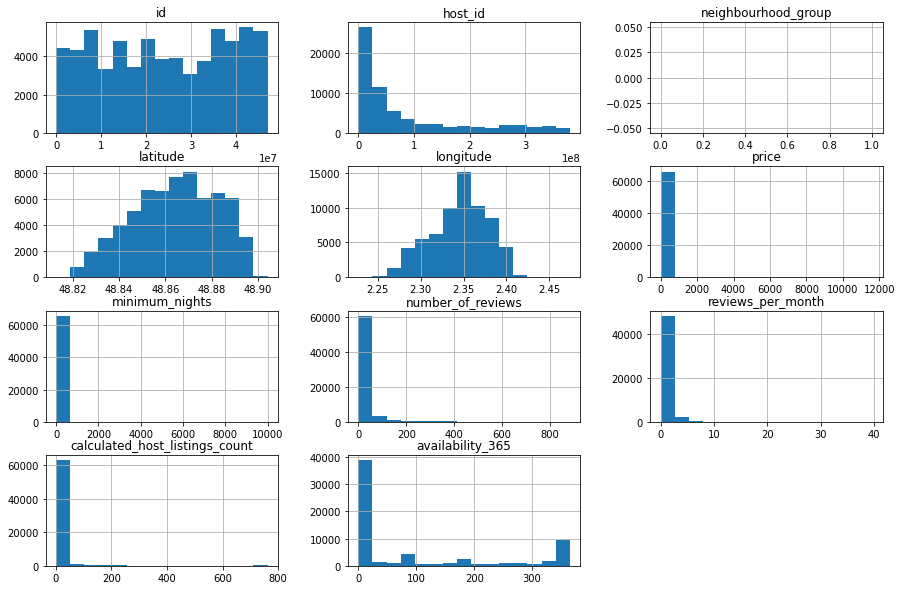

In [56]:
# tracer l'histogramme des variables numériques
df.hist(bins=15, figsize=(15,10));

## **4) Analyser les données**

En observant les données présentées, on peut observer que les variables `price`,` minimum_nights` et `calcul_host_listing_count`,  qu'ils ont une distribution déformée qui rend difficile la visualisation et la compréhension des données.

Pour cette analyse raison, les procédures suivantes ont été effectuées:

* Résumé statique en utilisant la méthode `describe ()`
* Analysez les *boxplot* des variables sélectionnées.

In [57]:
#résumé statistique des variables numériques
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,65917.000000,65917.000000,65917.000000,50229.000000,65917.000000,65917.000000
mean,114.280201,5.656113,18.783394,0.689335,16.427098,96.354173
std,220.155923,44.279940,40.678117,0.983954,86.017717,137.362947
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,59.000000,1.000000,1.000000,0.130000,1.000000,0.000000
50%,80.000000,2.000000,5.000000,0.360000,1.000000,0.000000
75%,120.000000,4.000000,18.000000,0.870000,2.000000,179.000000
max,11600.000000,9999.000000,882.000000,39.620000,762.000000,365.000000


En observant les informations fournies, c'est possible d'obtenir des informations importantes sur la distribution et la présence de certaines valeurs indésirables pour l'analyse:

* La valeur `price` de 75% des données est de 120 euros et la valeur maximale est de 11.600 euros;
* La valeur maximale de `minimun_nights` est 9999, beaucoup plus élevée que le nombre de jours dans une année (365 jours);
* La valeur minimale de `price` est zéro, ce qui peut être une erreur, car nous savons que sur Airbnb, il n'y a pas de possibilité de louer un logement gratuit;

### Boxplot Price:

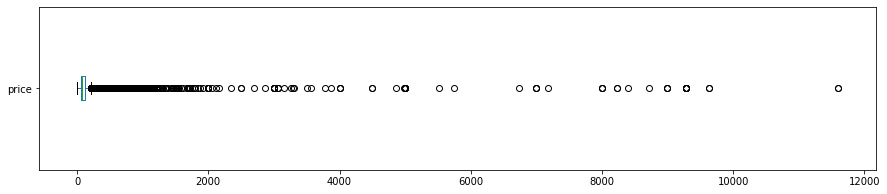


price: valeurs supérieures à 1000 euros
207 Lignes
0.3140%


In [58]:
# price
df.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# voir la quantité de valeurs supérieures à 1000 pour le prix
print("\nprice: valeurs supérieures à 1000 euros")
print("{} Lignes".format(len(df[df.price > 1000])))
print("{:.4f}%".format((len(df[df.price > 1000]) / df.shape[0])*100))

# df.price.plot(kind='box', vert=False, xlim=(0,1000), figsize=(15,3));

### Boxplot minimum_nights

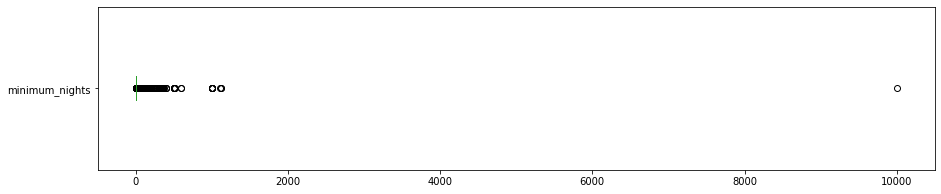

minimum_nights: valeurs supérieures à 30:
906 Lignes
1.3745%


In [59]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# voir montant des valeurs supérieures à 30 jours pour minimum_nights
print("minimum_nights: valeurs supérieures à 30:")
print("{} Lignes".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

### Traitement des données

Après avoir vérifié la présence de *outliers*, nous supprimerons ces informations incohérentes dans `price` et` minimum_nights`.

Nous supprimerons également les valeurs nulles pour `price`.

Nous imprimerons à nouveau les tableaux de distribution.



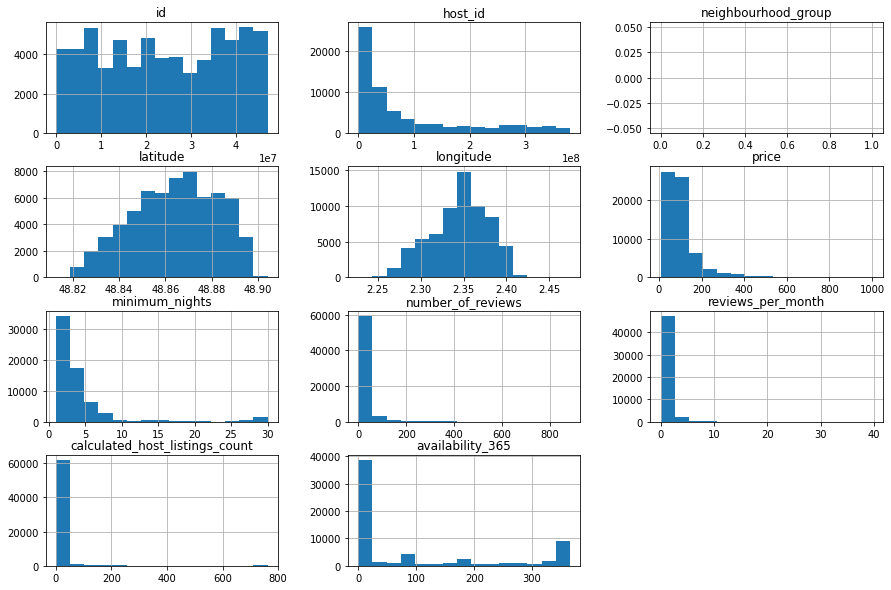

In [60]:
# retirer  les outliers: 
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1000].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

# retirer les valeurs de price égales à zéro
df_clean.drop(df_clean[df_clean.price == 0].index, axis=0, inplace=True)

# tracer l'histogramme des variables numériques
df_clean.hist(bins=15, figsize=(15,10));

## **5)Prix ​​de location moyens**


Dans cette étape, les valeurs moyennes sont présentées en fonction des hébergements disponibles:

In [61]:
# moyenne de la colonne `price``
print("Moyenne en Euros: " + str(round((df_clean['price'].mean()),2)))

Moyenne en Euros: 106.25



Le prix de location moyen selon les données extraites est de 106,25 euros.

## **6)Analyse des types de propriétés les plus louées sur Airbnb**

La variable `room_type` indique le type de propriété annoncé. De cette manière, il est possible d'identifier le nombre de types de propriétés proposées et leurs quantités.

In [62]:
# quantité de chaque type de propriété disponible
df_clean.room_type.value_counts()

Entire home/apt    55564
Private room        7457
Hotel room          1315
Shared room          416
Name: room_type, dtype: int64

In [63]:
# pourcentage de chaque type de propriété disponible
df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    0.858105
Private room       0.115162
Hotel room         0.020308
Shared room        0.006425
Name: room_type, dtype: float64

## **7) Analyser la répartition des hébergements par région et les emplacements les plus chers**

En regroupant les informations de `neighborhood_group`, nous pouvons vérifier le nombre de logements par région.




In [64]:
df_clean.neighbourhood.value_counts()

Buttes-Montmartre      7282
Popincourt             6292
Vaugirard              4854
Entrepôt               4666
Batignolles-Monceau    4361
Ménilmontant           3793
Buttes-Chaumont        3772
Opéra                  3185
Passy                  3175
Temple                 2878
Reuilly                2670
Observatoire           2499
Gobelins               2292
Bourse                 2186
Panthéon               2148
Luxembourg             1928
Hôtel-de-Ville         1887
Élysée                 1752
Palais-Bourbon         1739
Louvre                 1393
Name: neighbourhood, dtype: int64


Compilant les informations de `groupe_de_voisinage` et de `prix`,  c'est possible d'identifier la disposition des prix moyens de location par régions à Paris.


In [65]:
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Élysée            183.815068
Louvre            155.232592
Palais-Bourbon    152.660150
Luxembourg        152.325207
Bourse            142.698536
Passy             140.390866
Hôtel-de-Ville    137.996290
Temple            132.189020
Panthéon          118.748138
Opéra             115.432339
Name: price, dtype: float64


De cette manière, il est possible de vérifier que les quartiers les plus chers sont situés dans des régions centrales proches des principaux points de la ville.

<center><img alt="Analisando Airbnb" width="70%" src=http://bemiranda.com/wp-content/uploads/2016/10/paris_map_arrondissements.jpg></center>

Comme les latitudes et longitudes de les propriétés sont fournies, c'est possible de tracer chaque point. Pour cela, `x = longitude` et `y = latitude` sont considérés.

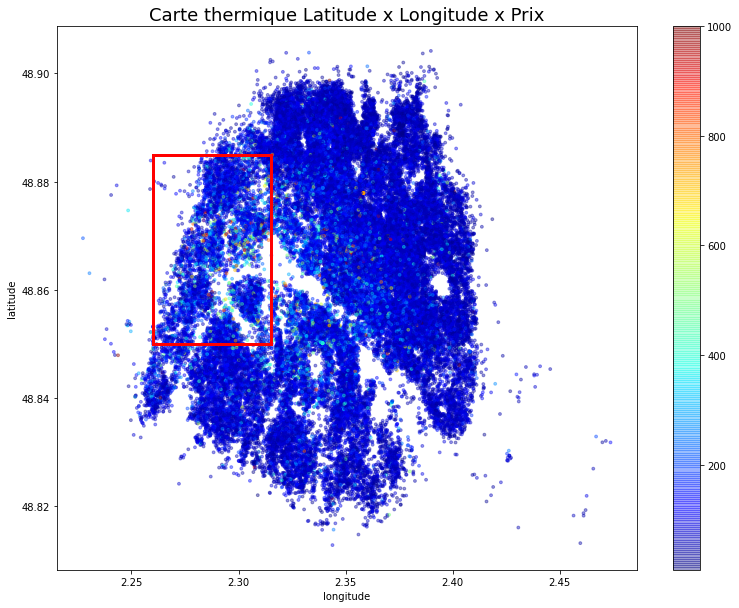

In [66]:
# propriétés par latitude-longitude
fig, ax = plt.subplots()

df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(13,10), ax=ax)
ax.set_title('Carte thermique Latitude x Longitude x Prix',fontsize= 18)
ax.add_patch(Rectangle((2.26,48.85), 0.055, 0.035, fc='none', ec='r', lw=3) )

plt.show()




Nous soulignons dans le rectangle rouge la concentration de propriétés plus chères.

Ce n'est pas un hasard si le positionnement du rectangle marque l'une des régions avec la plus grande concentration d'attractions touristiques de la ville.

Une meilleure compréhension est possible en notant la position de la Seine par rapport à la figure au-dessus de la ville de Paris.

## **8)Existe-t-il des options moins chères dans des emplacements plus chers?**

Nous avons pu vérifier que les prix les plus chers sont situés à proximité des points touristiques les plus importants de la ville, mais y a-t-il de bonnes opportunités pour séjourner dans ces régions.

Pour analyser cela, nous allons vérifier la distribution des valeurs par région et essayer d'identifier des prix d'hébergement intéressants qui peuvent être considérés comme des * valeurs aberrantes * par rapport à la distribution des prix de la région.


Quartiers sélectionnés:

* Élysée 
* Louvre
* Palais-Bourbon

####Élysée

In [67]:
 sel_ely = df_clean.loc[df_clean['neighbourhood'] == 'Élysée']


In [68]:
sel_ely['price'].describe()

count    1752.000000
mean      183.815068
std       169.448209
min        12.000000
25%        80.000000
50%       125.000000
75%       214.000000
max      1000.000000
Name: price, dtype: float64

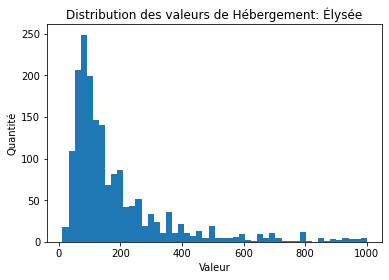

In [69]:
fig, ax = plt.subplots()

ax.hist('price', data=sel_ely,bins=50)
ax.set_title('Distribution des valeurs de Hébergement: Élysée')
ax.set_xlabel('Valeur')
ax.set_ylabel('Quantité')

plt.show()

In [70]:
sel_ely['price'].loc[sel_ely['price'] <= 25].value_counts().sum()

8

Il existe **8** options d'hébergement en dessous de **80** euros dans la région **Élysée**.

Répartis parmi les valeurs ci-dessous:

In [71]:
sel_ely['price'].loc[sel_ely['price'] <= 25].value_counts()

20    3
17    2
12    1
25    1
24    1
Name: price, dtype: int64

####Louvre

In [72]:
 sel_lou = df_clean.loc[df_clean['neighbourhood'] == 'Louvre']

In [73]:
sel_lou['price'].describe()

count    1393.000000
mean      155.232592
std       121.712395
min        10.000000
25%        80.000000
50%       115.000000
75%       185.000000
max       999.000000
Name: price, dtype: float64

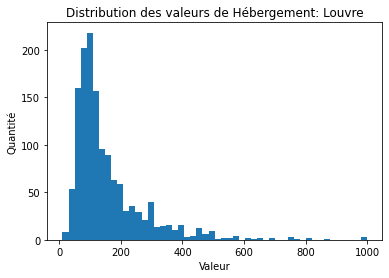

In [74]:
fig, ax = plt.subplots()

ax.hist('price', data=sel_lou,bins=50)
ax.set_title('Distribution des valeurs de Hébergement: Louvre')
ax.set_xlabel('Valeur')
ax.set_ylabel('Quantité')

plt.show()

In [75]:
sel_lou['price'].loc[sel_lou['price'] <= 80].value_counts().sum()

355

Il y a **355** hébergements en dessous de **80** euros dans la région du **Louvre**.

Répartis parmi les valeurs ci-dessous:

In [76]:
sel_lou['price'].loc[sel_lou['price'] <= 80].value_counts()

80    30
60    28
65    27
70    26
75    23
50    21
55    17
79    15
59    12
73    10
45    10
68     9
74     8
69     8
72     6
58     5
40     5
53     5
62     4
71     4
30     4
35     4
78     4
77     4
49     4
44     4
66     4
56     4
64     4
76     3
46     3
39     3
41     3
42     2
27     2
63     2
36     2
67     2
54     2
43     2
61     2
47     2
48     2
51     2
10     2
57     1
37     1
34     1
33     1
32     1
28     1
52     1
26     1
24     1
23     1
Name: price, dtype: int64

####Palais-Bourbon

In [77]:
 sel_pal = df_clean.loc[df_clean['neighbourhood'] == 'Palais-Bourbon']

In [78]:
sel_pal['price'].describe()

count    1739.00000
mean      152.66015
std       129.48363
min        12.00000
25%        73.00000
50%       108.00000
75%       185.00000
max       999.00000
Name: price, dtype: float64

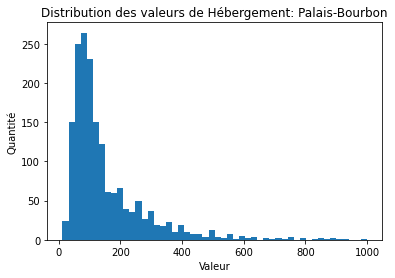

In [79]:
fig, ax = plt.subplots()

ax.hist('price', data=sel_pal,bins=50)
ax.set_title('Distribution des valeurs de Hébergement: Palais-Bourbon')
ax.set_xlabel('Valeur')
ax.set_ylabel('Quantité')

plt.show()

In [80]:
sel_pal['price'].loc[sel_pal['price'] <= 73].value_counts().sum()

437

Il existe **437** séjours en dessous de **73** euros dans la  région du **Palais-Bourbon**

Répartis parmi les valeurs ci-dessous:

In [81]:
sel_pal['price'].loc[sel_pal['price'] <= 73].value_counts()

60    57
70    45
50    37
65    35
40    27
55    19
45    19
35    15
69    13
71    12
59    12
49     9
30     9
52     7
72     7
73     6
63     6
68     6
62     6
39     5
46     5
38     5
47     5
56     5
67     5
64     5
51     4
57     4
61     3
25     3
28     3
32     3
66     3
48     3
54     3
44     3
58     2
43     2
41     2
29     2
53     2
42     2
33     1
34     1
36     1
37     1
27     1
26     1
22     1
20     1
17     1
16     1
12     1
Name: price, dtype: int64

## **Conclusion **

Il s'agit d'une base de données qui présente certaines limites par rapport aux données en raison d'informations manquantes et même de lacunes dans la saisie et la disposition des informations. Après un traitement adéquat des problèmes de *outliers*, d'informations manquantes et d'informations dont le remplissage n'est pas conforme à la réalité, comme par exemple les valeurs de prix remplies de zéro, il a été possible d'extraire des informations intéressantes.

Il a été possible d'observer les prix moyens, les types d'hébergement disponibles, les emplacements les plus chers par région et les options d'hébergement les moins chères parmi les quartiers selon la base de données.

J'espère que cela vous a plu et que les idées ont porté leurs fruits. En cas de critiques et suggestions, veuillez contacter:
<center>

 [Linkedin](https://www.linkedin.com/in/renan-marin-b3158173/) 

[Github](https://github.com/rnmarin)

<br>

<br>

<center><img alt="Analisando Airbnb" width="70%" src=https://cdn.pariscityvision.com/library/image/5449.jpg></center>